In [1]:
# Problem Statement 
# In this exercise, I will be using Loan prediction problem dataset and try to create clusters
# by taking couple of attributes(ApplicantIncome, LoanAmount) from the dataset

# Dataset can be found below

[Loan_Dataset](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset?select=train_u6lujuX_CVtuZ9i.csv)

In [2]:
## Importing required python libraries
import random as randm
import pandas as panda
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
## Reading dataset and print all the rows and columns.

loan_Data = panda.read_csv('C:/Users/Rashika/OneDrive - Northeastern University/Fall-2020/ADS/kmeans-assignment/kmeans_dataset.csv')
print(loan_Data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
5    LP001011    Male     Yes          2      Graduate           Yes   
6    LP001013    Male     Yes          0  Not Graduate            No   
7    LP001014    Male     Yes         3+      Graduate            No   
8    LP001018    Male     Yes          2      Graduate            No   
9    LP001020    Male     Yes          1      Graduate            No   
10   LP001024    Male     Yes          2      Graduate            No   
11   LP001027    Male     Yes          2      Graduate           NaN   
12   LP001028    Male     Yes          2      Graduate          

In [4]:
## As we can see above, there are 12 columns and 614 rows. Let's print first five rows of the dataset for better clarity
loan_Data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [6]:
## Cleaning the dataset and checking for null values

loan_Data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
## AS we can see above there are 13 missing values in Gender, 15 in Dependents, 22 in LoanAmount and so on. 

# To create K-Means cluesters I am gonna use LoanAmount and ApplicantIncome. Hence will find the median of LoanAmount and replace the null value of
# LoanAmount with median

loan_Data["LoanAmount"].median()
loan_Data["LoanAmount"].fillna(loan_Data["LoanAmount"].median(), inplace = True)

# Make sure there won't be any null in LoanAmount
loan_Data["LoanAmount"].isnull().sum()

0

In [8]:
## I am going to take LoanAmount, ApplicantIncome attributes to construct the clusters. 

attributes = loan_Data[["LoanAmount","ApplicantIncome"]]
print(attributes)

     LoanAmount  ApplicantIncome
0         128.0             5849
1         128.0             4583
2          66.0             3000
3         120.0             2583
4         141.0             6000
5         267.0             5417
6          95.0             2333
7         158.0             3036
8         168.0             4006
9         349.0            12841
10         70.0             3200
11        109.0             2500
12        200.0             3073
13        114.0             1853
14         17.0             1299
15        125.0             4950
16        100.0             3596
17         76.0             3510
18        133.0             4887
19        115.0             2600
20        104.0             7660
21        315.0             5955
22        116.0             2600
23        112.0             3365
24        151.0             3717
25        191.0             9560
26        122.0             2799
27        110.0             4226
28         35.0             1442
29        

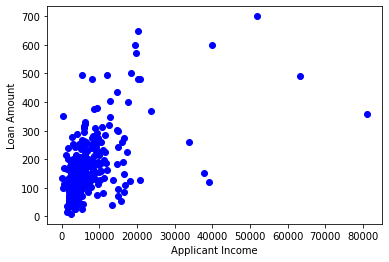

In [9]:
##  Visualizing Data. In this step, I am visualizing how loan amount is connected with Annual Income  

plt.scatter(attributes["ApplicantIncome"],attributes["LoanAmount"],c='blue')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [10]:
# Data Pre-processing

attributes.describe()

,LoanAmount,ApplicantIncome
count,614.000000,614.000000
mean,145.752443,5403.459283
std,84.107233,6109.041673
min,9.000000,150.000000
25%,100.250000,2877.500000
50%,128.000000,3812.500000
75%,164.750000,5795.000000
max,700.000000,81000.000000


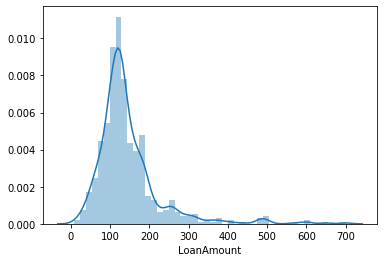

In [11]:
'''Are the data dimensions skewed?'''

sns.distplot(attributes['LoanAmount'])

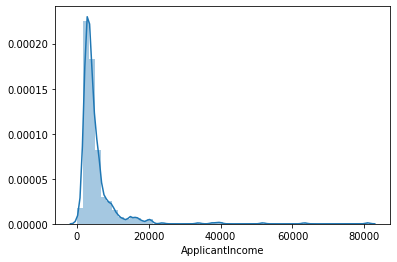

In [12]:
sns.distplot(attributes['ApplicantIncome'])

In [13]:
'''Looks like data is skewed. We log transform the data to remove the skew. Add a constant to offset any negative values. '''

attributestransform = (np.log(attributes + 1))
print(attributestransform.shape)
attributestransform.head(3)

(614, 2)


,LoanAmount,ApplicantIncome
0,4.859812,8.674197
1,4.859812,8.430327
2,4.204693,8.006701


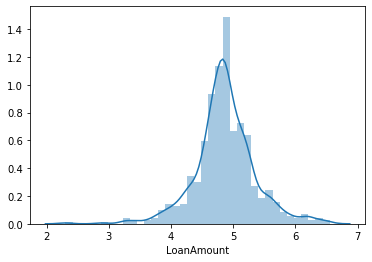

In [14]:
'''Checking if log transfors made any difference?'''

sns.distplot(attributestransform['LoanAmount'])

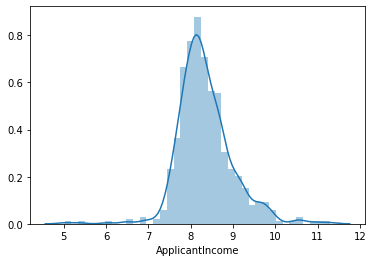

In [15]:
sns.distplot(attributestransform['ApplicantIncome'])

In [16]:
'''Scale the data to make sure all dimensions have equal mean and variance'''

scaler = StandardScaler() 
scaler.fit(attributestransform)
attributescale = panda.DataFrame(scaler.transform(attributestransform))
attributescale.columns = attributestransform.columns
attributescale.describe()

,LoanAmount,ApplicantIncome
count,6.140000e+02,6.140000e+02
mean,3.841706e-16,9.350555e-16
std,1.000815e+00,1.000815e+00
min,-5.227264e+00,-5.157770e+00
25%,-5.067337e-01,-5.841435e-01
50%,-1.280320e-02,-1.477208e-01
75%,4.983292e-01,5.017959e-01
max,3.438784e+00,4.593738e+00


In [17]:
attributescale.head(5)

,LoanAmount,ApplicantIncome
0,-0.012803,0.516186
1,-0.012803,0.137806
2,-1.348663,-0.519479
3,-0.143351,-0.751605
4,0.182981,0.555727


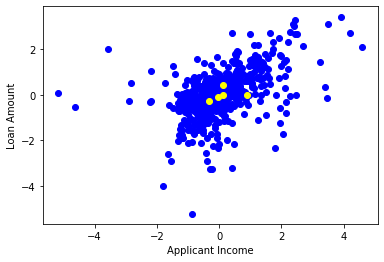

In [23]:
## Now, to implement K-means clustering, we need to select the value of K, which I am gonna take it as 5 and select random centroid

K_Means = 5 #Number of clusters

# Select random data points as centroids
K_Means_Centroids = (attributescale.sample(n = K_Means))
plt.scatter(attributescale["ApplicantIncome"],attributescale["LoanAmount"],c='blue')
plt.scatter(K_Means_Centroids["ApplicantIncome"],K_Means_Centroids["LoanAmount"],c='yellow')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

In [24]:
## Implementing K-Means clustering algorithm
# First, assign all the data points to the closest centroid based on Euclidean distance
# Second step is to recalculate the centroids of new clusters
# Repeat above steps untill i) fixed number of iterations or ii) centroids do not change.

# In this implementation, I am checing (ii) condition where centroids' values do not change after two iterations, will stop the algorithm

difference_in_centroids = 1
j = 0

while(difference_in_centroids!=0):
    temp_attributes = attributescale
    i = 1
    for index1,row_c in K_Means_Centroids.iterrows():
        euclidean_distances=[]
        for index2,row_d in temp_attributes.iterrows():
            x = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            y = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            distance = np.sqrt(x+y)  
            euclidean_distances.append(distance)
        attributescale[i] = euclidean_distances
        i = i+1

    clusters = []
    for index,row in attributescale.iterrows():
        closest_distance = row[1]
        position = 1
        for i in range(K_Means):
            if row[i+1] < closest_distance:
                closest_distance = row[i+1]
                position = i + 1
        clusters.append(position)

    attributescale["Cluster"] = clusters
    K_Means_Centroids_New = attributescale.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        difference_in_centroids = 1
        j = j + 1
    else:
        difference_in_centroids = (K_Means_Centroids_New['LoanAmount'] - K_Means_Centroids['LoanAmount']).sum() + (K_Means_Centroids_New['ApplicantIncome'] - K_Means_Centroids['ApplicantIncome']).sum()
        print("Difference in value of newly computed centroids: " + str(difference_in_centroids.sum()))
    K_Means_Centroids = attributescale.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

Difference in value of newly computed centroids: 0.3608745345973271
Difference in value of newly computed centroids: 0.122156691767172
Difference in value of newly computed centroids: 0.06039266765033208
Difference in value of newly computed centroids: 0.16319997192608066
Difference in value of newly computed centroids: 0.12141011408506613
Difference in value of newly computed centroids: 0.046602836750251314
Difference in value of newly computed centroids: 0.0007706017662394982
Difference in value of newly computed centroids: 0.1338881181150262
Difference in value of newly computed centroids: -0.0897642451176038
Difference in value of newly computed centroids: -0.093233985804906
Difference in value of newly computed centroids: -0.0547955863779024
Difference in value of newly computed centroids: -0.059077400189258444
Difference in value of newly computed centroids: -0.09012928440987346
Difference in value of newly computed centroids: 0.01367456521974511
Difference in value of newly comp

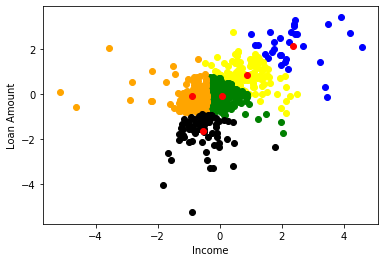

In [26]:
## Visualizing the clusters
colors = ['blue','yellow','green','orange','black']

for i in range(K_Means):
    loan_Data = attributescale[attributescale["Cluster"] == i + 1]
    plt.scatter(loan_Data["ApplicantIncome"],loan_Data["LoanAmount"],c = colors[i])

plt.scatter(K_Means_Centroids["ApplicantIncome"],K_Means_Centroids["LoanAmount"],c = 'red')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

In [27]:
## Another implementation where we run K-Means for fixed number of iterations.
j = 0

while(j != 100):
    temp_attributes = attributescale
    i = 1
    for index1,row_c in K_Means_Centroids.iterrows():
        euclidean_distances=[]
        for index2,row_d in temp_attributes.iterrows():
            x = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            y = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            distance = np.sqrt(x+y)  
            euclidean_distances.append(distance)
        attributescale[i] = euclidean_distances
        i = i+1

    clusters = []
    for index,row in attributescale.iterrows():
        closest_distance = row[1]
        position = 1
        for i in range(K_Means):
            if row[i+1] < closest_distance:
                closest_distance = row[i+1]
                position = i + 1
        clusters.append(position)

    attributescale["Cluster"] = clusters
    K_Means_Centroids = attributescale.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    j = j + 1

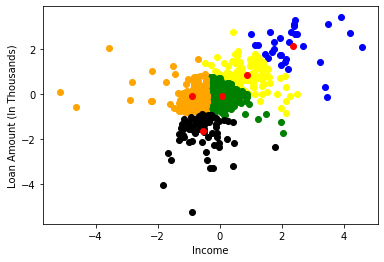

In [29]:
## Visualizing the clusters for above implementation
colors = ['blue','yellow','green','orange','black']

for i in range(K_Means):
    loan_Data = attributescale[attributescale["Cluster"] == i + 1]
    plt.scatter(loan_Data["ApplicantIncome"],loan_Data["LoanAmount"],c = colors[i])

plt.scatter(K_Means_Centroids["ApplicantIncome"],K_Means_Centroids["LoanAmount"],c = 'red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## References
[Euclidean Distance](https://pythonprogramming.net/euclidean-distance-machine-learning-tutorial/)